In [34]:
import pandas as pd
import numpy as np

import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn
assert sklearn.__version__ >= "0.20"

data=pd.read_csv('https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/airline_passenger_satisfaction.csv')
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Loyalty
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,5,2,5,5,5,3,5,5,Neutral or Dissatisfied,1
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,4,5,5,3,5,2,5,5,Satisfied,4
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,5,3,5,5,3,4,3,3,Satisfied,4
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,4,4,5,2,5,5,Satisfied,4
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,4,4,5,4,3,3,3,3,Satisfied,4


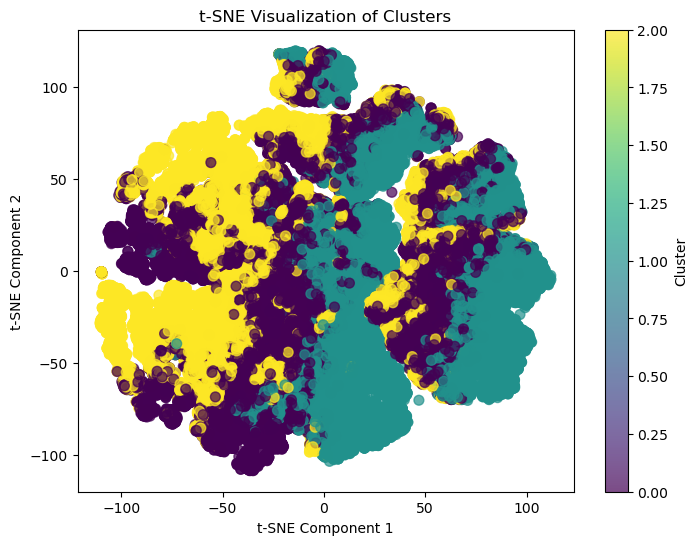

In [139]:
from sklearn.manifold import TSNE

# Apply t-SNE for dimensionality reduction to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# Plot t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=X_original['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Clusters')
plt.colorbar(label='Cluster')
plt.show()

In [97]:
print("Cluster range & Innertia scare are", cluster_range, inertia)
print("Silhouette Score" , silhouette_scores)

Cluster range & Innertia scare are range(1, 11) [2510907.0000000037, 2159984.153403648, 2010551.4619185291, 1888336.7972184028, 1785730.906724501, 1665602.9270827614, 1606796.7617220478, 1562824.1404597256, 1530555.5897869405, 1506525.3677664227]
Silhouette Score [0.13846545138386285, 0.10561330710449907, 0.10803902705619879, 0.11322270406849862, 0.11927377283083933, 0.12151584494090356, 0.11575541923187027, 0.11035275663859163, 0.09385555238384821]


Estimated number of clusters: 6
Estimated number of noise points: 119536
Silhouette Score: -0.24550029823129962
Cluster Profiles:
         Gender        Age Type of Travel Class  Flight Distance  \
Cluster                                                           
0          1.0  53.600000            0.0   0.0            493.4   
1          1.0  53.666667            0.0   0.0           2607.0   
2          1.0  44.200000            0.0   0.0            574.4   
3          1.0  45.400000            0.0   0.0           1658.2   
4          0.0  43.400000            0.0   0.0            919.2   
5          1.0  56.800000            0.0   0.0            594.8   

         Departure Delay  Arrival Delay  \
Cluster                                   
0               1.200000            2.4   
1               0.166667            0.0   
2               0.000000            1.2   
3               1.800000            0.2   
4               2.200000            0.0   
5               4.400000       

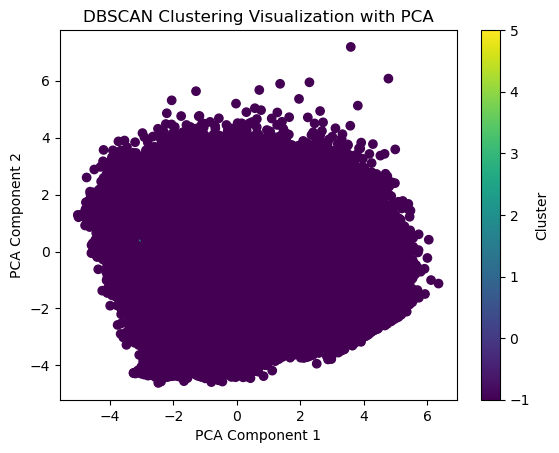

In [103]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Remove 'Loyalty' from the dataset
X_original = data.drop(columns=['Loyalty'])

# Step 2: Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

# Step 3: Implement DBSCAN and evaluate clusters
# Set parameters for DBSCAN
eps_value = 0.5  # Adjust based on data
min_samples_value = 5  # Adjust based on data

# Fit DBSCAN
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
labels = dbscan.fit_predict(X_scaled)

# Calculate the number of clusters (excluding noise, which is labeled as -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

# Calculate Silhouette Score if there are more than one clusters
if n_clusters > 1:
    silhouette_avg = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score: {silhouette_avg}")
else:
    print("Silhouette Score: Not applicable (only one cluster found)")

# Step 4: Add Clustering Results to the Original Data
X_original['Cluster'] = labels
data['Cluster'] = labels

# Step 5: Analyze Cluster Profiles (ignoring noise points if present)
cluster_profiles = X_original[X_original['Cluster'] != -1].groupby('Cluster').mean()
print("Cluster Profiles:\n", cluster_profiles)

# Optional: Visualize clustering results using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering Visualization with PCA')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE for dimensionality reduction to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# Plot t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=X_reduced['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Clusters')
plt.colorbar(label='Cluster')
plt.show()